In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')


df = pd.read_csv('/content/drive/My Drive/az_tunes.csv')
df.sample(10)



Mounted at /content/drive


,user_id,age_group,subscription_status,engagement_time
798,17746,35 and over,not_subscribed,4.09
401,11493,35 and over,not_subscribed,2.86
760,12913,35 and over,not_subscribed,2.23
715,13804,18-34,subscribed,10.66
458,13276,35 and over,not_subscribed,7.00
835,17326,35 and over,not_subscribed,2.02
603,15842,under 18,not_subscribed,5.16
876,12684,35 and over,not_subscribed,4.17
66,11080,35 and over,not_subscribed,7.00
944,17449,35 and over,subscribed,5.12


# **Loading the DataSet**

In [3]:
df.shape[0]

1000

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,1000.0,NaN,NaN,NaN,15024.803,2927.044957,10000.0,12452.5,15184.0,17481.25,19976.0
age_group,1000,3,35 and over,408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subscription_status,1000,2,subscribed,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engagement_time,1000.0,NaN,NaN,NaN,6.18003,2.757166,0.22,3.9175,6.0,8.11,16.98


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              1000 non-null   int64  
 1   age_group            1000 non-null   object 
 2   subscription_status  1000 non-null   object 
 3   engagement_time      1000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


In [61]:
#check if there are duplicates
df.duplicated().sum()

#There are no duplicates in the data

0

In [64]:
#check if there are null values
df.isnull().sum().sum()

#There are no duplicates in the data

0

# Overview of Data

In [40]:
def labelled_barplot(data, feature, perc=False, n=None):

  total = len(data[feature])
  count = data[feature].nunique()

  if(n==None):
    total = float(len(data))
    f,ax = plt.subplots(figsize=(count+2,8))
  else:
    f,ax = plt.subplots(figsize=(n+2,8))

  sns.countplot( data=data,
                 x=feature,
                 palette='Paired',
                 order = df[feature].value_counts().index[:n],
                 ax=ax)
  plt.xticks(rotation=90)


  for p in ax.patches:
    height = p.get_height()
    if(perc==True):
     label = '{0:.2f}%'.format(height/total*100)
    else:
      label = '{0}'.format(height)

    x1 = p.get_x()+p.get_width()/2
    y1 = height
    ax.annotate(
                 label,
                (x1,y1),
                 ha='center',
                 va='center',
                 textcoords='offset points',
                 xytext=(0,5),
                 fontsize=12,
                 color='black',
                 rotation=0
                 )



<ipython-input-40-785924ec14cc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( data=data,


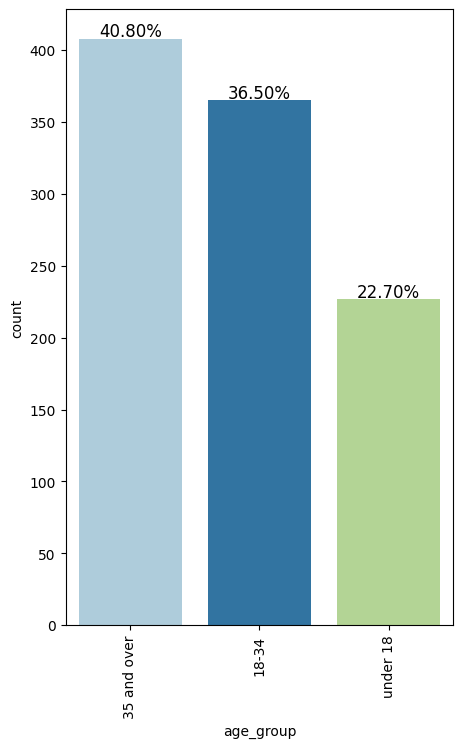

In [41]:
#Plotting the age-group countplot

labelled_barplot(df,'age_group',True)

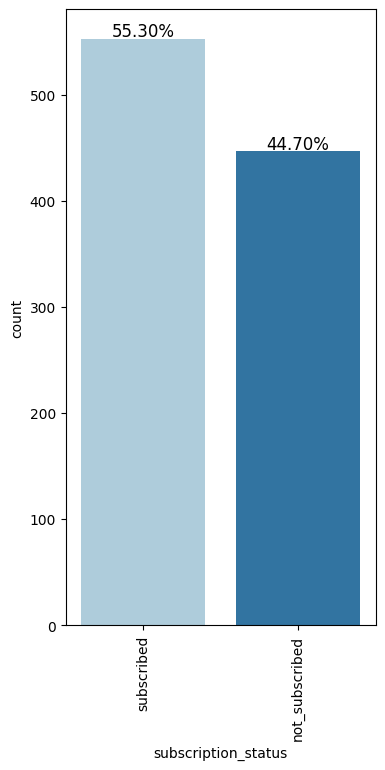

In [44]:
labelled_barplot(df,'subscription_status',True)

In [57]:
def hist_box_plot(data,feature,bins=50,kde=True):

  f,(ax1,ax2) = plt.subplots(
                      figsize=(15,8),
                      nrows=2,
                      sharex=True,
                      gridspec_kw={'height_ratios':(0.25,0.75)}
                      )

  sns.boxplot(
      data=data,
      x=feature,
      ax=ax1,
      showmeans=True,
      )
  ax1.axvline(
      data[feature].mean(),
      color='green',
      linestyle='--'
      )
  ax1.axvline(
      data[feature].median(),
      color='black',
      linestyle='-'
      )
  sns.histplot(
      data=data,
      x=feature,
      kde=kde,
      ax=ax2,
      bins=bins
      )if bins else sns.histplot(
      data=data,
      x=feature,
      kde=kde,
      ax=ax2
      )



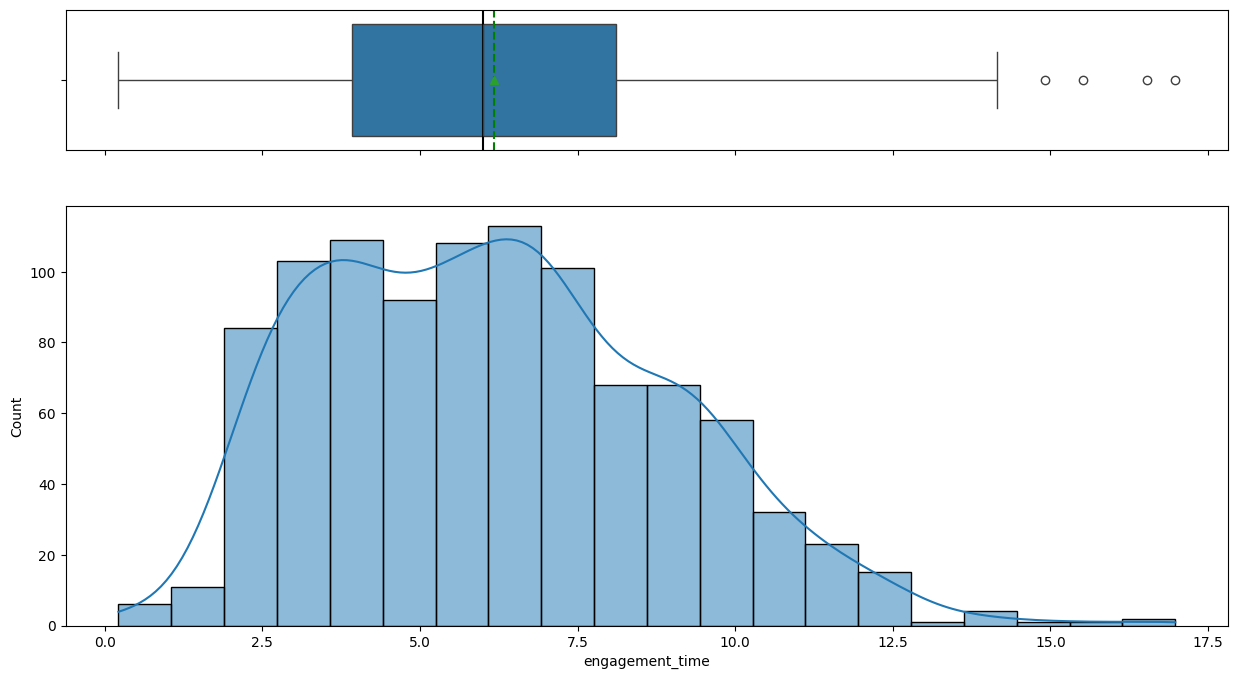

In [60]:
#Estimated time Histogram and count plot

hist_box_plot(df,'engagement_time',20,True)

# One Sample T test

##Step1: Defining Null and Alternate Hypothesis

H0 : The mean listening time of audio is less than or equal to 6 hours

Ha: The mean listening time of audio is more than 6 hours

## Step 2: Select Appropriate test

We are comparing sample mean against population mean. Standard deviation of population is unknown. The samples are random samples and sample size is 1000.
The test we choose is one sample t-test

## Step 3: Decide the significance level

The alpha value at which the P-value is tested is 0.05

## Step 4: Calculate P-value

In [3]:
from scipy.stats import ttest_1samp

test_static,p_value = ttest_1samp(df['engagement_time'],6,alternative='greater')
print(test_static,p_value)

2.0648187232381248 0.019598877431817586


1.6448536269514722


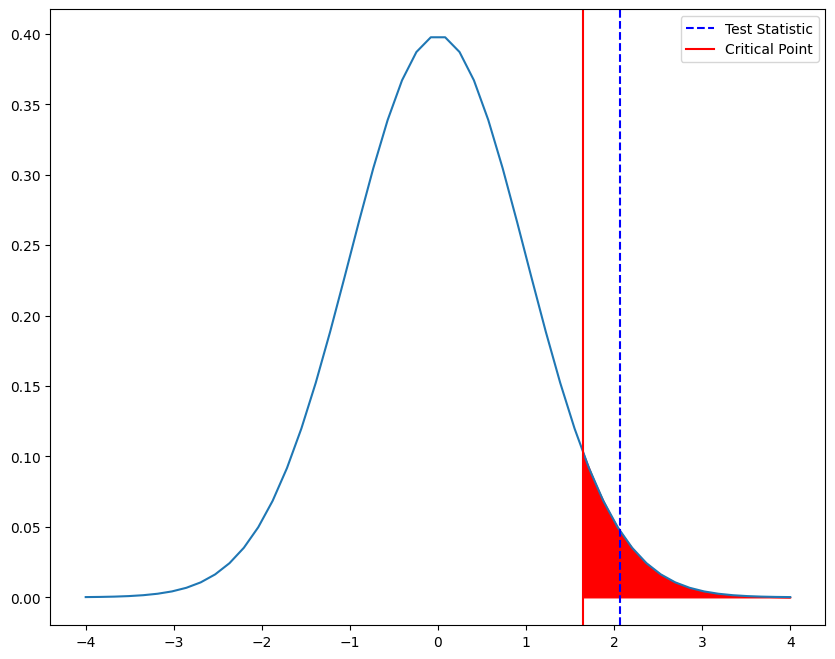

In [10]:
#Let us visualize where the test static and critical point
from scipy.stats import norm
alpha =0.05

#The region of consideration is greather than 6 hours
#It is a one tailed test foccusing on the right hand side
critical_point = norm.ppf(1-alpha)
print(critical_point)
f,ax = plt.subplots(figsize=(10,8))
x1 = np.linspace(-4,4,50)
plt.plot(x1,norm.pdf(x1))
plt.axvline(test_static,color='blue',linestyle='--',label='Test Statistic')
plt.axvline(critical_point,color='red',linestyle='-',label='Critical Point')
x2 = np.linspace(critical_point,4,50)
plt.fill_between(x2,norm.pdf(x2),color='red')
plt.legend()
plt.show()

## Step 5: Compare P and alpha Value

In [4]:
if p_value < 0.05:
  print('Reject Null Hypothesis - There is statistical evidence that the engagement time is more than 6 hrs')
else:
  print('Do not reject Null Hypothesis - There is significant evidence that engagement time is less than 6 hrs')

Reject Null Hypothesis - There is statistical evidence that the engagement time is more than 6 hrs


## Step 6: Drawing Conclusion

In [5]:
print('There is statistical evidence that the engagement time is more than 6 hrs')

There is statistical evidence that the engagement time is more than 6 hrs


# Chi-Square Test of Independence

Is the difference in proportions of subscribers & non-subscribers (in 3 groups - under 18, 18-34, and over 35) significantly different to conclude that a particular group is most likely to subscribe?

In [16]:
#Let us create a crosstab of two categorical variables

cross_tab=pd.crosstab(df['age_group'],df['subscription_status'],margins='all')

<Axes: xlabel='age_group'>

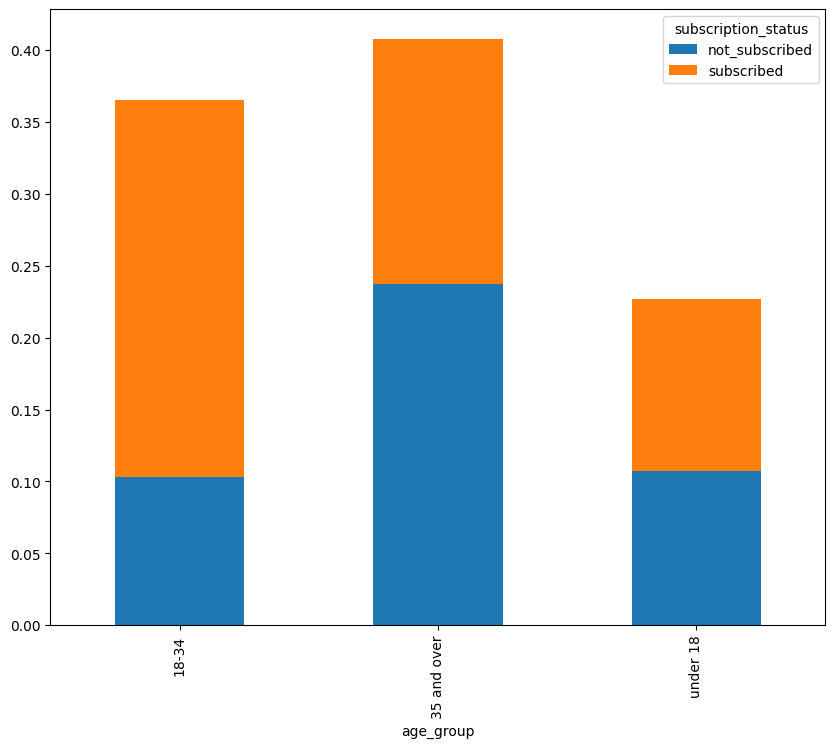

In [15]:
#Let us visualize a bar plot

pd.crosstab(df.age_group,df.subscription_status,normalize=True).plot(kind='bar',stacked=True,figsize=(10,8))

##Step1: Defining Null and Alternate Hypothesis

Ho: The categorical variables age-group and subscription are independent of each other

Ha: The categorical variables age-group and subscription are dependent of each other

## Step 2: Select Appropriate test

We choose chi-2 test for independence.


## Step 3: Decide the significance level

The test carried out at 0.05 level of significance

## Step 4: Collect and prepare data

In [19]:
#To perform chi-2 test creating a contingency table

contingency_table = pd.crosstab(df['age_group'],df['subscription_status'])

## Step 5: Calculate P-value

In [17]:
#importing respective libraries
from scipy.stats import chi2_contingency

#calculate the test results
chi_test_static,p_value,dof,expected_frequency=chi2_contingency(contingency_table)
print(chi_test_static,p_value)

70.23716243606756 5.600076564450542e-16


## Step 6: Compare P and alpha Value

In [18]:
#Comapring p_value against level of significance

if(p_value<0.05):
  print('Reject Null Hypothesis - There is statistical evidence that age-group and subscription are dependent of each other')
else:
  print('Do not reject Null Hypothesis - There is statistical evidence that age-group and subscription are independent of each other')

Reject Null Hypothesis - There is statistical evidence that age-group and subscription are dependent of each other


## Step 7: Drawing Conclusion

There is enough statistical evidence that age-group and subscription are independent of each other

# Actionable insights and recommendations

The mean listening time is 6.18 hours
There is enough statistical evidence (p-value of 0.0196 at 5% level of significance) to conclude that the average app engagement time of AZ Tunes is greater than the market average

The difference in proportions of subscribers across the 3 age groups is significant enough (p-value of 5.60 x 10^(-16)) to conclude that the age group 18-34 is most likely to subscribe

AZ Tunes can focus more on designing the special offers for this age group to be used in the marketing campaign